# Communications Analysis - Indebted Take Home Excercise 
[By Angelica Mariano]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('communications.csv')

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145941 entries, 0 to 145940
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   message_id        145941 non-null  object 
 1   customer_id       145941 non-null  object 
 2   sent_at           145941 non-null  object 
 3   clicked           145941 non-null  int64  
 4   converted         145941 non-null  int64  
 5   client_id         145941 non-null  object 
 6   gender            114265 non-null  object 
 7   customer_country  115795 non-null  object 
 8   age               123921 non-null  float64
 9   created_at        145941 non-null  object 
 10  client_name       145941 non-null  object 
 11  product_type      145941 non-null  object 
 12  client_country    145941 non-null  object 
 13  channel           145941 non-null  object 
 14  message_number    145941 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 16.7+ MB


In [10]:
df.head()

,message_id,customer_id,sent_at,clicked,converted,client_id,gender,customer_country,age,created_at,client_name,product_type,client_country,channel,message_number
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-04 10:03:16.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,1.0
1,0f98a1bbf7f2b66f420816a65c8d9b77,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-12 08:34:09.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,2.0
2,97f9ed967d2334ce0b4ebfcfc9b5c25c,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-19 08:58:11.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,3.0
3,3d0615ca493d69e16265ab688495c134,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-28 10:43:04.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,4.0
4,3eb3a03a007bd1adf7482e6d95f7b942,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-02-04 11:28:56.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,5.0


In [11]:
df2 = df.copy()

In [12]:
df2['sent_at_dt']= pd.to_datetime(df2['sent_at'], format='%Y-%m-%d %H:%M:%S',errors='coerce').dt.date
df2['sent_at_hr']= pd.to_datetime(df2['sent_at'], format='%Y-%m-%d %H:%M:%S',errors='coerce').dt.hour
df2['sent_at_day']= pd.to_datetime(df2['sent_at'], format='%Y-%m-%d %H:%M:%S',errors='coerce').dt.strftime('%a')
df2.head()

,message_id,customer_id,sent_at,clicked,converted,client_id,gender,customer_country,age,created_at,client_name,product_type,client_country,channel,message_number,sent_at_dt,sent_at_hr,sent_at_day
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-04 10:03:16.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,1.0,2021-01-04,10,Mon
1,0f98a1bbf7f2b66f420816a65c8d9b77,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-12 08:34:09.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,2.0,2021-01-12,8,Tue
2,97f9ed967d2334ce0b4ebfcfc9b5c25c,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-19 08:58:11.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,3.0,2021-01-19,8,Tue
3,3d0615ca493d69e16265ab688495c134,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-28 10:43:04.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,4.0,2021-01-28,10,Thu
4,3eb3a03a007bd1adf7482e6d95f7b942,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-02-04 11:28:56.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,5.0,2021-02-04,11,Thu


<AxesSubplot:>

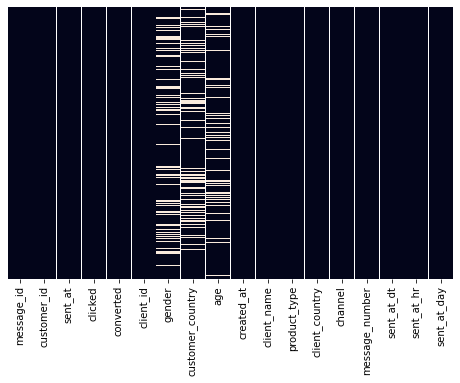

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False)

In [14]:
df2.isnull().sum()

message_id              0
customer_id             0
sent_at                 0
clicked                 0
converted               0
client_id               0
gender              31676
customer_country    30146
age                 22020
created_at              0
client_name             0
product_type            0
client_country          0
channel                 0
message_number          0
sent_at_dt              0
sent_at_hr              0
sent_at_day             0
dtype: int64

## Imputing Null Values

#### Customer Country

In [17]:
pd.crosstab(df2['client_country'], df2['customer_country'],values=df2.customer_id,aggfunc=pd.Series.nunique)

customer_country,CA,NZ,UK
client_country,,,
CA,2207,93,101
NZ,79,1081,208
UK,456,747,2882


In [18]:
pd.crosstab(df2['client_country'], df2['customer_country'],values=df2.customer_id,aggfunc=pd.Series.nunique,margins = True, 
    normalize = 'index').style.format('{:.1%}')

customer_country,CA,NZ,UK
client_country,,,
CA,91.9%,3.9%,4.2%
NZ,5.8%,79.0%,15.2%
UK,11.2%,18.3%,70.6%
All,34.9%,24.5%,40.6%


Majority of client's customers are residing in the same client country

In [19]:
df2['customer_country'] = df2.groupby('client_country').customer_country.transform(lambda x: x.fillna(x.mode()[0]))
df2.isnull().sum()

message_id              0
customer_id             0
sent_at                 0
clicked                 0
converted               0
client_id               0
gender              31676
customer_country        0
age                 22020
created_at              0
client_name             0
product_type            0
client_country          0
channel                 0
message_number          0
sent_at_dt              0
sent_at_hr              0
sent_at_day             0
dtype: int64

#### Gender

In [23]:
#Impute Gender null values Per Customer Country 
df2['gender'] = df2.groupby('customer_country').gender.transform(lambda x: x.fillna(x.mode()[0]))
df2.isnull().sum()

message_id              0
customer_id             0
sent_at                 0
clicked                 0
converted               0
client_id               0
gender                  0
customer_country        0
age                 22020
created_at              0
client_name             0
product_type            0
client_country          0
channel                 0
message_number          0
sent_at_dt              0
sent_at_hr              0
sent_at_day             0
dtype: int64

#### Age

<AxesSubplot:xlabel='age'>

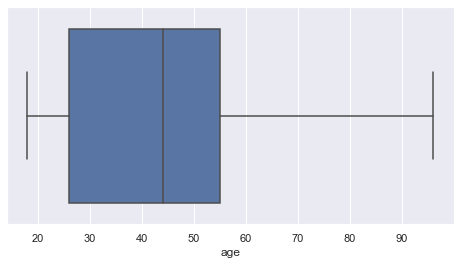

In [128]:
#boxplot for age before immputing null values
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df["age"])

No outliers, use mean to  impute null values

In [127]:
# Impute Age Null values By Customer Country and Gender 
df2.groupby(['customer_country','gender']).age.mean()

customer_country  gender
CA                F         41.779455
                  M         47.354105
NZ                F         39.072637
                  M         42.926724
UK                F         41.965026
                  M         45.998152
Name: age, dtype: float64

In [62]:
def age_imputer(x):
    
    if x['age']==0 and x['customer_country']=='CA' and x['gender']=='F':
        return 42
    elif x['age']==0 and x['customer_country']=='CA' and x['gender']=='M':
        return 47
    
    elif x['age']==0and x['customer_country']=='NZ' and x['gender']=='F':
        return 39
    elif x['age']==0 and x['customer_country']=='NZ' and x['gender']=='M':
        return 43
    
    elif x['age']==0 and x['customer_country']=='UK' and x['gender']=='F':
        return 42   
    elif x['age']==0 and x['customer_country']=='UK' and x['gender']=='M':
        return 46  
    else:
        return x['age']


In [64]:
df2['age'] = df2.fillna(0).apply(lambda x:age_imputer(x),axis=1)

In [65]:
df2.isnull().sum()

message_id          0
customer_id         0
sent_at             0
clicked             0
converted           0
client_id           0
gender              0
customer_country    0
age                 0
created_at          0
client_name         0
product_type        0
client_country      0
channel             0
message_number      0
sent_at_dt          0
sent_at_hr          0
sent_at_day         0
dtype: int64

In [66]:
df2.tail()

,message_id,customer_id,sent_at,clicked,converted,client_id,gender,customer_country,age,created_at,client_name,product_type,client_country,channel,message_number,sent_at_dt,sent_at_hr,sent_at_day
145936,76d93652f659e6ca7839e0e9543f2e4a,3f58b9ce296dbdc59001a366501b8ea1,2021-10-01 10:07:04.692000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,F,CA,42.0,2021-09-25 20:53:43.692000+00:00,Beaver Bank,CreditCard,CA,Email,1.0,2021-10-01,10,Fri
145937,0a455855ccb00df28936e8ce9d4dc06e,8d788102b7e7e8deb2286396e2a8878d,2021-10-01 11:47:01.683000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,M,CA,46.0,2021-09-20 19:29:52.683000+00:00,Beaver Bank,CreditCard,CA,Email,1.0,2021-10-01,11,Fri
145938,cc0fffcd2b61f6d042b57dee6ac708b1,21a0b5def79c5b2d66e9ad4c0cc3fb3b,2021-10-01 12:48:57.220000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,M,CA,55.0,2021-09-24 11:09:14.220000+00:00,Beaver Bank,CreditCard,CA,SMS,1.0,2021-10-01,12,Fri
145939,fa847a2010017f81261bbc19f2b7819e,ecd70b4e32b3b7496c8070acf0b98965,2021-10-01 13:33:02.070000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,M,CA,54.0,2021-09-22 10:44:41.070000+00:00,Beaver Bank,CreditCard,CA,Email,1.0,2021-10-01,13,Fri
145940,7c1f417c29ed7c451a1046114c26e0e7,fba02d3eecbb0049ba97bf869ffdf260,2021-10-01 16:10:08.646000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,M,CA,60.0,2021-09-21 11:35:53.646000+00:00,Beaver Bank,CreditCard,CA,SMS,1.0,2021-10-01,16,Fri


<AxesSubplot:xlabel='age'>

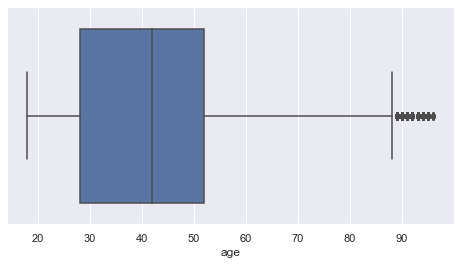

In [129]:
#boxplot for age after immputing null values
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=df2["age"])

In [130]:
# Creating Age Bracket
df2.age.quantile([0,0.25,0.5,0.75,1])

0.00    18.0
0.25    28.0
0.50    42.0
0.75    52.0
1.00    96.0
Name: age, dtype: float64

In [107]:
df2['age_range'] = pd.cut(x=df2['age'], bins=[17, 28, 42, 52,96], labels=['18-28', '29-42', '43-52','53+'])
df2.head()

,message_id,customer_id,sent_at,clicked,converted,client_id,gender,customer_country,age,created_at,client_name,product_type,client_country,channel,message_number,sent_at_dt,sent_at_hr,sent_at_day,age_range
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-04 10:03:16.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,1.0,2021-01-04,10,Mon,43-52
1,0f98a1bbf7f2b66f420816a65c8d9b77,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-12 08:34:09.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,2.0,2021-01-12,8,Tue,43-52
2,97f9ed967d2334ce0b4ebfcfc9b5c25c,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-19 08:58:11.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,3.0,2021-01-19,8,Tue,43-52
3,3d0615ca493d69e16265ab688495c134,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-28 10:43:04.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,4.0,2021-01-28,10,Thu,43-52
4,3eb3a03a007bd1adf7482e6d95f7b942,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-02-04 11:28:56.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,5.0,2021-02-04,11,Thu,43-52


In [125]:
#binning checker
df2[df2['age']==29].age_range.value_counts()

29-42    2428
53+         0
43-52       0
18-28       0
Name: age_range, dtype: int64

In [122]:
df2.columns

Index(['message_id', 'customer_id', 'sent_at', 'clicked', 'converted',
       'client_id', 'gender', 'customer_country', 'age', 'created_at',
       'client_name', 'product_type', 'client_country', 'channel',
       'message_number', 'sent_at_dt', 'sent_at_hr', 'sent_at_day',
       'age_range'],
      dtype='object')

In [123]:
column_names = ['customer_id', 'created_at', 'gender', 'age', 'age_range','customer_country' , 
                'client_id', 'client_name', 'client_country', 'product_type',
                'message_id', 'sent_at', 'sent_at_dt', 'sent_at_hr', 'sent_at_day', 'channel','message_number',
                'clicked', 'converted']
df3 = df2.reindex(columns=column_names)
df3.head()

,customer_id,created_at,gender,age,age_range,customer_country,client_id,client_name,client_country,product_type,message_id,sent_at,sent_at_dt,sent_at_hr,sent_at_day,channel,message_number,clicked,converted
0,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-03 15:58:50.376000+00:00,F,51.0,43-52,UK,cfcd208495d565ef66e7dff9f98764da,SwanPay,UK,BNPL,28d82c62db5989d9441351f58738c6a8,2021-01-04 10:03:16.376000+00:00,2021-01-04,10,Mon,SMS,1.0,0,0
1,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-03 15:58:50.376000+00:00,F,51.0,43-52,UK,cfcd208495d565ef66e7dff9f98764da,SwanPay,UK,BNPL,0f98a1bbf7f2b66f420816a65c8d9b77,2021-01-12 08:34:09.376000+00:00,2021-01-12,8,Tue,SMS,2.0,0,0
2,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-03 15:58:50.376000+00:00,F,51.0,43-52,UK,cfcd208495d565ef66e7dff9f98764da,SwanPay,UK,BNPL,97f9ed967d2334ce0b4ebfcfc9b5c25c,2021-01-19 08:58:11.376000+00:00,2021-01-19,8,Tue,Email,3.0,0,0
3,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-03 15:58:50.376000+00:00,F,51.0,43-52,UK,cfcd208495d565ef66e7dff9f98764da,SwanPay,UK,BNPL,3d0615ca493d69e16265ab688495c134,2021-01-28 10:43:04.376000+00:00,2021-01-28,10,Thu,Email,4.0,0,0
4,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-03 15:58:50.376000+00:00,F,51.0,43-52,UK,cfcd208495d565ef66e7dff9f98764da,SwanPay,UK,BNPL,3eb3a03a007bd1adf7482e6d95f7b942,2021-02-04 11:28:56.376000+00:00,2021-02-04,11,Thu,Email,5.0,0,0


In [124]:
df3.to_csv('comms_analysis.csv',index=False)